<a href="https://colab.research.google.com/github/hinda-mt/hinda-mt/blob/main/henda's_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                      
---
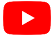   [Project : ***Performing Exploratory Data Analysis (EDA)  on  a Youtube channel:*** ](https://www.youtube.com/watch?v=YPph59-rTxA)





---







Objective
The aim of this project is **to analyze this Youtube channel performence** in order to gain information from the data provided by Ken Jee and **to understand the behaviour of the subscribers**

**competition announcement:**
    
https://www.youtube.com/watch?v=YPph59-rTxA

 **License:**  
I collected this data from the YouTube API and through my own google analytics. Thus use of it must uphold the YouTube API's terms of service: https://developers.google.com/youtube/terms/api-services-terms-of-service

1.Introduction:

---



About Ken Jee 👨‍💻

In order to introduce Ken Jee, I think the best way is to just steal his ABOUT from YouTube. So following is Kens ABOUT for people who read this notebook and might not know who Ken who provided his rich data is.

Who is Ken Jee?

Data Science and Sports Analytics are my passions. My name is Ken Jee and I have been working in the data science field doing sports analytics for the last 5 years. I have held data science positions in companies ranging from startups to fortune 100 organizations. I transitioned into data science from a business and consulting background. When I was first starting out on my data science journey I was extremely lost; there were very few resources for me to learn about this field from. I decided to start making YouTube videos to share my experiences and to hopefully help others get break into the data science and sports analytics fields.

About the project 📕

In this project Ken has provided his YouTube channel data directly from the YouTube API as his first community project.

2.analysis action Plan 💡

---



Since the data is broken down into 2 different data set / categories of YouTube analytics sections, and since I am not at all familiar with these metrics, I will  break down only 2 of the two csv provided by Ken, respectively.

Implicit Links to the 2 sections (type:csv file)


**click here**  : [Aggregated Metrics by Country and Subscriber Status](https://www.kaggle.com/kenjee/ken-jee-youtube-data?select=Aggregated_Metrics_By_Video.csv)

**click here**  :[Aggregated Metrics By Video](https://www.kaggle.com/kenjee/ken-jee-youtube-data?select=Aggregated_Metrics_By_Country_And_Subscriber_Status.csv) 

For each section I will try to provide a description of the features as I am trying to understand them along the way and their data type. Then for most sections there will be some sort of cleaning and feature engineering to prepare the sets for exploration. Lastly, I will try to visualize the data with an interactive plot way to make it more robust.

#**Loading Data and Importing the Libraries**
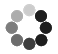

In [ ]:
#Importing the Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
!pip install pygal_maps_world

     |████████████████████████████████| 270 kB 5.4 MB/s 
     |████████████████████████████████| 129 kB 45.5 MB/s 
  Created wheel for pygal-maps-world: filename=pygal_maps_world-1.0.2-py3-none-any.whl size=278561 sha256=0c9c651a0a2cc74c8931cfa6f883905cedc7a4f423b9c2810243a8f7edea133f
  Stored in directory: /root/.cache/pip/wheels/54/e6/11/5be0d3206bdc0ea8f0fcf1fe32661d7e614863c8b6a22655ae
Successfully built pygal-maps-world


In [ ]:
!pip install geoplot

     |████████████████████████████████| 10.8 MB 9.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 34.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 35.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 12.1 MB 26.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.0 MB 47.3 MB/s 
     |████████████████████████████████| 19.3 MB 1.2 MB/s 
     |████████████████████████████████| 16.7 MB 398 kB/s 
     |████████████████████████████████| 6.3 MB 32.7 MB/s 
     |████████████████████████████████| 44 kB 2.5 MB/s 
  Created wheel for cartopy: filename=Cartopy-0.19.0.post1-cp37-cp37m-linux_x86_64.w

This file consists of 224 rows (videos) and 19 features, lets break down the features although some of them are pretty obvious, I will use the descriptions from YouTube developers google site for the metrics where available:

📌 Video : External link of unique YouTube Video from Kens channel. Characterd data type.

📌 Video Title : Title of the YouTube Video. Character data type.

📌 Video publish time : The date that the YouTube Video was published.  date data type.

📌 Comments added : The number of times that users commented on a video. Numeric data type as double class.

📌 Shares : The number of times that users shared a video through the Share button. Numeric data type as double class.

📌 Dislikes : The number of times that users indicated that they disliked a video by giving it a negative rating. Numeric data type as double class.

📌 Likes : The number of times that users indicated that they liked a video by giving it a positive rating. Numeric data type as double class.

📌 Subscribers lost : The number of times that users unsubscribed from a channel, metric only includes users who unsubscribed from the specified video’s watch page. Numeric data type as double class.

📌 Subscribers gained : The number of times that users subscribed to a channel, metric only includes users who unsubscribed from the specified video’s watch page. Numeric data type as double class.

📌 RPM (USD) : Revenue Per Mille (RPM) is a metric that represents how much money you have earned per 1,000 video views. Numeric data type as double class.

📌 CPM (USD) : The estimated gross revenue per thousand ad impressions. Numeric data type as double class.

📌 Average percentage viewed (%) : The average percentage of a video watched during a video playback. Numeric data type as double class.

📌 Average view duration : The average length, in seconds, of video playbacks. Data type represents Time.

📌 Views : The number of times that a video was viewed. Numeric data type as double class.

📌 Watch time (hours) : Total watch time for each unique YouTube Video in hours. Numeric data type as double class.

📌 Subscribers : (Subscribers gained) - (Subscribers lost), indicating performance based on how many subscribers gained or lost. Numeric data type as double class.

📌 Your estimated revenue (USD) : The total estimated net revenue from all Google-sold advertising sources as well as from non-advertising sources for the selected date range and region. Numeric data type as double class.

📌 Impressions : How many times thumbnails were shown to viewers on YouTube through registered impressions. Numeric data type as double class.

📌 Impressions click-through rate (%) : The ratio of annotations that viewers clicked to the total number of clickable annotation impressions. Numeric data type as double class.

**What is a good impressions click-through rate?**
Basically, it's the percentage of people who view your ad (impressions) divided by the ones who click your ad (clicks). As far as what constitutes a good click through rate, the average is around 1.91% for search and 0.35% for display.



**difference between rpm and cpm youtube** : CPM is cost per 1000 ad impressions before YouTube revenue share. RPM is your total revenue(after YouTube's revenue share) per 1000 views.

In [ ]:
df1=pd.read_csv('Aggregated_Metrics_By_Country_And_Subscriber_Status.csv')
df2=pd.read_csv('Aggregated_Metrics_By_Video.csv')


In [ ]:
df1.shape

(55292, 15)

From the data context we get the following description for the data set:

Aggregated Metrics By Video with Country and Subscriber Status - This has the same data as aggregated metrics by video, but it includes dimensions for which country people are viewing from and if the viewers are subscribed to the channel or not.

This file consists of 55.292 rows(videos) and 15 features, lets try to break down the features:

📌 Video Title : Title of the YouTube Video. Character data type.

📌 External Video ID : External link of YouTube Video from Kens channel. Character data type.

📌 Video Length : Time length of YouTube Video in Seconds (sec). Numeric data type as double class.

📌 Thumbnail link : External link of thumbnail representing particular YouTube Video. Character data type.

📌 Country Code : Two-letter country abbreviation of each view. Character data type.

📌 Is Subscribed : Binomial (True or False) value representing if viewer is subscribed on the channel or not. Logical data type.

📌 Views : The number of views for each user. Numeric data type as double class.

📌 Video Likes Added : Amount of likes. Numeric data type as double class.

📌 Video Dislikes Added : Amount of dislikes. Numeric data type as double class.

📌 Video Likes Removed : Amount of likes removed. Numeric data type as double class.

📌 User Subscriptions Added : Users subscribed to the channel on particular video. Numeric data type as double class.

📌 User Subscriptions Removed : Users removed their subscription from the channel on particular video. Numeric data type as double class.

📌 Average View Percentage : The average view percentage the user spends watching the video. Character data type.

📌 Average Watch Time : The average time the user spends watching the video in seconds (sec). Character data type.

📌 User Comments Added : Amount of comments posted. Numeric data type as double class.



In [ ]:
df2.shape

(224, 19)

##**Problem Set / Questions to be Answered**


**What topics get the most viewership?**

**What impacts watch time and click through rate?**

**Can we predict if a title will be clickable?**

**What types of video titles and thumbnails drive the most traffic( "viral" videos )?**

**Who is my core audience and what are they interested in?**

**What types of videos have lead to the most growth?**

**What type of content are people engaging with the most or watching the longest?**


#part(1)
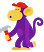

In [ ]:
# Comments dropped because it only had 0 in it. 
# for the others it's a choice 
df1=df1.drop(['External Video ID','Thumbnail link','User Comments Added'],axis=1)

In [ ]:
df1.set_index('Is Subscribed') 

,Video Title,Video Length,Country Code,Views,Video Likes Added,Video Dislikes Added,Video Likes Removed,User Subscriptions Added,User Subscriptions Removed,Average View Percentage,Average Watch Time
Is Subscribed,,,,,,,,,,,
True,🌶 Hot Topics in Tech: Data Science Explained #...,59,HK,23,1,0,0,2,0,0.671870,39.640348
True,🌶 Hot Topics in Tech: Data Science Explained #...,59,ME,3,0,0,0,0,0,0.498870,29.433333
True,🌶 Hot Topics in Tech: Data Science Explained #...,59,RW,2,0,0,0,0,0,0.681780,40.225000
True,🌶 Hot Topics in Tech: Data Science Explained #...,59,US,979,81,6,8,16,4,0.694854,40.996389
False,🌶 Hot Topics in Tech: Data Science Explained #...,59,DE,75,3,0,1,0,0,0.661515,39.029373
...,...,...,...,...,...,...,...,...,...,...,...
False,#66DaysOfData - 3 Reasons to Start!,53,MM,1,0,0,0,0,0,0.622642,33.000000
True,#66DaysOfData - 3 Reasons to Start!,53,SA,14,1,0,0,0,0,0.515569,27.325143
False,#66DaysOfData - 3 Reasons to Start!,53,DZ,2,0,0,0,0,0,0.782075,41.450000


##inspecting :

In [ ]:
df1.info() #the data is in a good format 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55292 entries, 0 to 55291
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Video Title                 55292 non-null  object 
 1   Video Length                55292 non-null  int64  
 2   Country Code                54906 non-null  object 
 3   Is Subscribed               55292 non-null  bool   
 4   Views                       55292 non-null  int64  
 5   Video Likes Added           55292 non-null  int64  
 6   Video Dislikes Added        55292 non-null  int64  
 7   Video Likes Removed         55292 non-null  int64  
 8   User Subscriptions Added    55292 non-null  int64  
 9   User Subscriptions Removed  55292 non-null  int64  
 10  Average View Percentage     53854 non-null  float64
 11  Average Watch Time          53854 non-null  float64
dtypes: bool(1), float64(2), int64(7), object(2)
memory usage: 4.7+ MB


In [ ]:
df1.describe()

,Video Length,Views,Video Likes Added,Video Dislikes Added,Video Likes Removed,User Subscriptions Added,User Subscriptions Removed,Average View Percentage,Average Watch Time
count,55292.000000,55292.000000,55292.000000,55292.000000,55292.000000,55292.000000,55292.000000,53854.000000,53854.000000
mean,896.678073,100.573157,4.239311,0.106055,0.175577,2.365279,0.053389,0.347821,205.297156
std,927.380801,1704.966002,65.291451,2.507351,3.601171,65.889539,0.766945,0.259734,206.542106
min,47.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,375.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.145948,85.442891
50%,545.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.320983,170.139725
75%,934.000000,27.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.486153,259.449958
max,5029.000000,285593.000000,9165.000000,399.000000,436.000000,9599.000000,103.000000,4.967797,5027.660000




*ken has reached near to 300.000 views and 9165 Likes with 9599 User Subscriptions Added  in total .

*He has reached for Average View Percentage : 4.96 with max nomber of  views :300.000 which represents the highest pourcentege  ken's has reached .





In [ ]:
for i in df1.columns:
    print('{} has unique values {}'.format(i,df1[i].unique()),'\n')

Video Title has unique values ['🌶 Hot Topics in Tech: Data Science Explained #SHORTS'
 'git for Data Science Made Simple... (Hopefully)'
 'Work From Home Data Scientist: Day in the Life'
 'Why is Balance Important in Data Science?'
 'Why are APIs Important for Data Science?'
 "Why You're Struggling to Learn Data Science"
 "Why You Probably Won't Become a Data Scientist"
 "Why You DON'T Want to be a WFH Data Scientist"
 'Why Selling Is An Important Data Science Skill'
 'Why Right NOW is a Great Time to Learn Data Science'
 'Why Kaggle Should Be Your Favorite Data Science Resource #shorts'
 'Why Is Data Engineering So HOT Right Now?'
 "Why I'm Starting Data Science Over Again." 'Why I Quit Data Science'
 'Why I Have 2 Offices for Data Science & Content Creation'
 'Why EVERYONE Should Start a Podcast (Including YOU)'
 'Why Data-Viz is so Darn Important (@Story by Data | Kate Strachnyi) - KNN EP. 16'
 'Where to Start Learning Data Science'
 'Where to Look for Data Science Jobs'
 'Where YOU

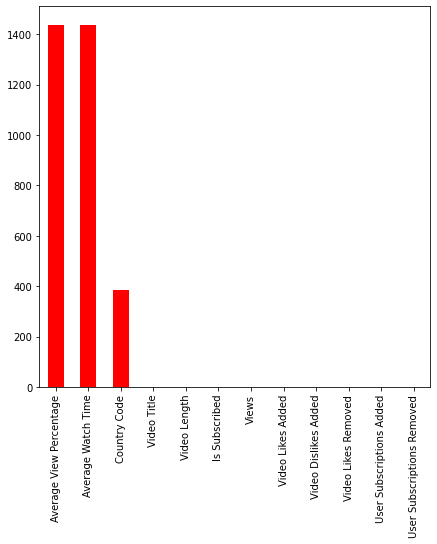

In [ ]:
#A BAR plot displays Null Values of this dataset as a segment and a circle.
NullValues=df1.isnull().sum().sort_values(ascending=False)
# Make the plot
NullValues.plot(kind='bar',color='r',figsize=(7,7))

plt.show()


In [ ]:
#DROP THEM
df1=df1.dropna(axis=0)

##data visualization and exploration

**Who are ken's audience and from which countries ?**

In [ ]:
df1.columns = df1.columns.str.strip()
df1['Country Code']=df1['Country Code'].str.lower()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


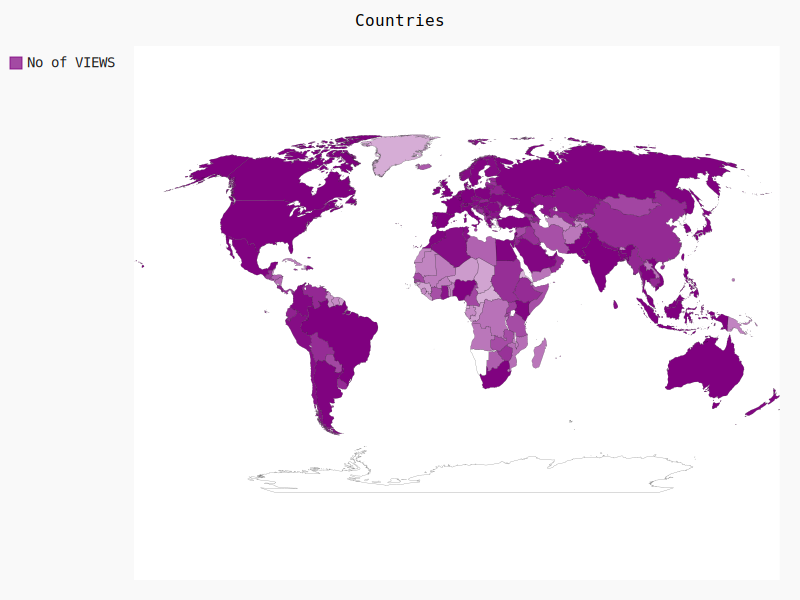

In [ ]:
# import pygal
# import Style class from pygal.style

from pygal_maps_world.maps import World
from pygal.style import Style
from IPython.display import SVG

# create a world map,
# Style class is used for using
# the custom colours in the map,
custom_style = Style(colors=('#7f007f','#330033','#190019') ) 
                        
worldmap =  World(style=custom_style)

# set the title of the map
worldmap.title = 'Countries'
worldmap.add('No of VIEWS',df1['Country Code'].value_counts().to_dict() )

worldmap.render_to_file('abc.svg')

 # hex code of colours are used
# for every .add() called
def show_svg():
    return SVG("abc.svg")

show_svg()

United States is the country with the largest YouTube audience by far followed by europe , India, asia and australia


The highest paying country is USA. since he is  getting views from USA then will be paied  well within few days but if he gets audience from India/Pak/ Dubai etc ..his earnings will be low

**which countries got the most Subscribers ?**

In [ ]:
data=df1.loc[df1['Is Subscribed']==True,'Country Code']

In [ ]:
coun_sub = pd.crosstab(df1['Country Code'],df1['Is Subscribed'])
coun_sub

Is Subscribed,False,True
Country Code,,
ad,66,28
ae,213,216
af,84,65
ag,43,31
ai,6,0
...,...,...
yt,10,1
za,219,220
zm,132,123


In [ ]:
#the top 10 countries with most subscribers 
coun_sub[1].sort_values(ascending=False).head(10)

Country Code
nl    222
ca    222
fr    222
vn    222
hk    222
us    222
ng    222
in    222
my    222
de    222
Name: True, dtype: int64

In [ ]:
#the top 10 countries with user watching but not subscribed
coun_sub[0].sort_values(ascending=False).head(10)

Country Code
au    223
us    223
nl    223
de    223
in    223
gb    223
sg    222
id    222
ca    222
fr    222
dtype: int64

In [ ]:
df1.sort_values(by='User Subscriptions Added' ,ascending=False,inplace=True)

data1=df1[df1['Views'] >=10000] #10k views would pays from $8-$40.
data1.head()

,Video Title,Video Length,Country Code,Is Subscribed,Views,Video Likes Added,Video Dislikes Added,Video Likes Removed,User Subscriptions Added,User Subscriptions Removed,Average View Percentage,Average Watch Time
35514,How I Would Learn Data Science (If I Had to St...,516,us,True,16389,1084,17,52,9599,103,0.376218,194.128574
35535,How I Would Learn Data Science (If I Had to St...,516,in,True,21717,1481,14,102,9560,93,0.303553,156.633190
12404,The Best Free Data Science Courses Nobody is T...,375,in,True,18327,1723,16,76,3760,46,0.328227,123.085212
53926,3 Proven Data Science Projects for Beginners (...,454,in,True,11415,1211,8,58,2615,22,0.304931,138.438887
12376,The Best Free Data Science Courses Nobody is T...,375,us,True,12895,1261,11,42,1458,18,0.397318,148.994433


**In which countries ken's youtube channel is popular the most by views ?**

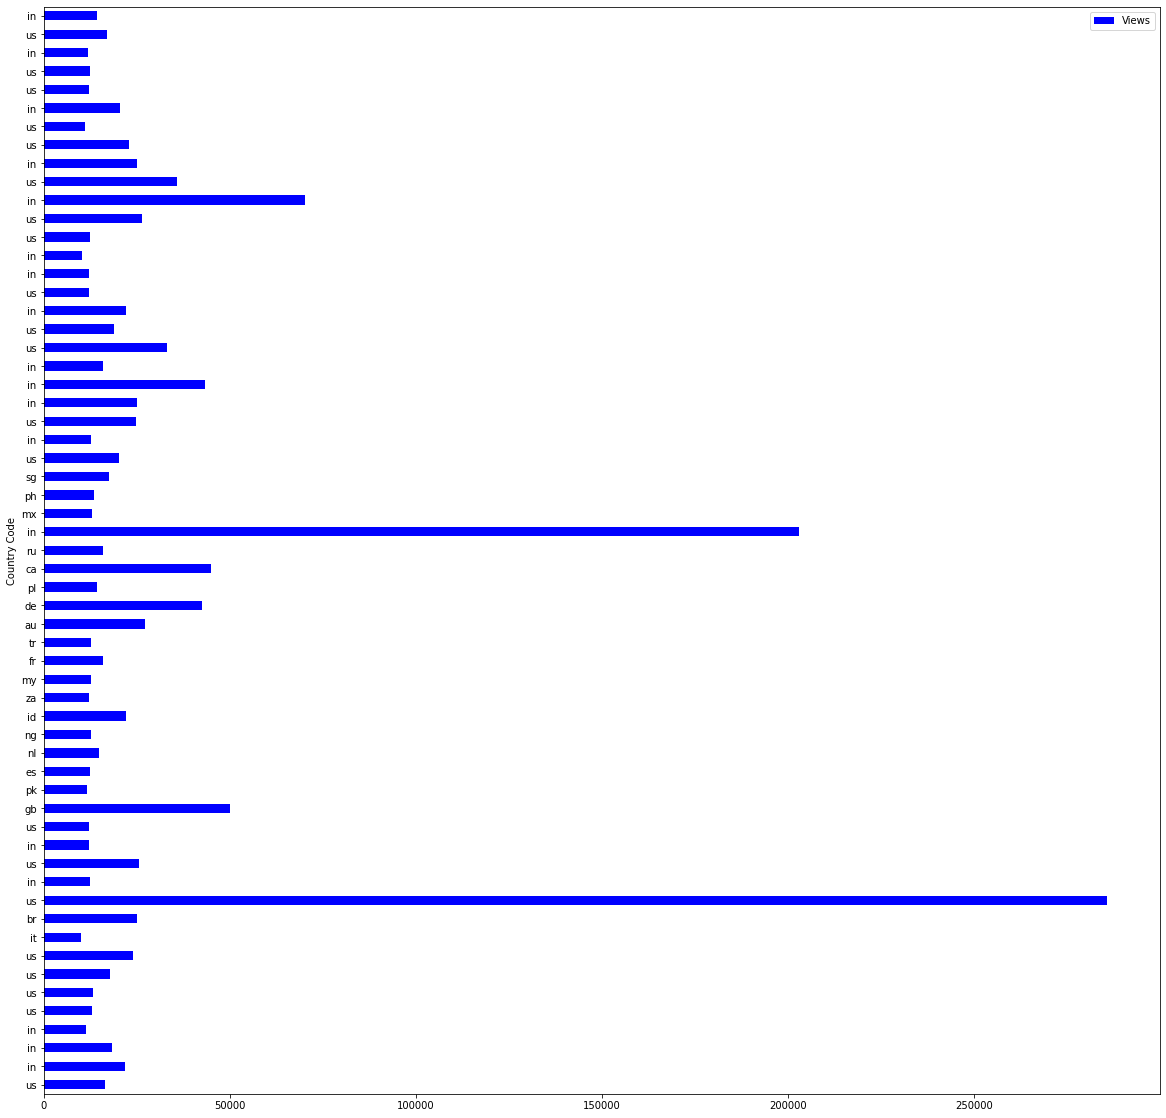

In [ ]:
data1.plot(kind='barh', x="Country Code",y="Views",color='b',figsize=(20,20)) #data1 10k views 
#each video per Country

Sorting BY  views :

1. USA 
2. INDIA
3. GB - United Kingdom of Great Britain and Northern Ireland

**In which countries ken's videos got audience attention the most (+) ?**

In [ ]:
df1.sort_values(by='Average Watch Time' ,ascending=False,inplace=True)

data1=df1[df1['Views'] >=50000] #10k views would pays from $8-$40.
data1

,Video Title,Video Length,Country Code,Is Subscribed,Views,Video Likes Added,Video Dislikes Added,Video Likes Removed,User Subscriptions Added,User Subscriptions Removed,Average View Percentage,Average Watch Time
35823,How I Would Learn Data Science (If I Had to St...,516,us,False,285593,9165,399,327,0,0,0.394064,203.337007
35664,How I Would Learn Data Science (If I Had to St...,516,in,False,203055,8442,170,436,0,0,0.323681,167.019581
12331,The Best Free Data Science Courses Nobody is T...,375,in,False,70240,4386,51,237,0,0,0.305809,114.678426


In [ ]:
df1[df1['Average Watch Time']>=3000] #50min
df1.head()

,Video Title,Video Length,Country Code,Is Subscribed,Views,Video Likes Added,Video Dislikes Added,Video Likes Removed,User Subscriptions Added,User Subscriptions Removed,Average View Percentage,Average Watch Time
54428,100K Channel Update + AMA Stream!,5029,hu,False,1,0,0,0,0,0,0.999734,5027.660
43109,Data Science Project from Scratch - Part 4 (Ex...,4119,ga,True,1,1,0,0,0,0,1.034110,4259.500
43225,Data Science Project from Scratch - Part 4 (Ex...,4119,bf,False,1,0,0,0,0,0,0.999932,4118.721
44759,Data Science Project from Scratch - Part 5 (M...,2734,sc,False,1,0,0,0,0,0,1.418639,3878.559
14982,Sports Analytics & Streaming Data Science on T...,4518,mk,False,1,0,0,0,0,0,0.849971,3840.170


In [ ]:
data1=df1[df1['Views'] >=10000] #10k views would pays from $8-$40.
data1.head()

,Video Title,Video Length,Country Code,Is Subscribed,Views,Video Likes Added,Video Dislikes Added,Video Likes Removed,User Subscriptions Added,User Subscriptions Removed,Average View Percentage,Average Watch Time
49450,Beginner Kaggle Data Science Project Walk-Thro...,2296,us,False,24708,436,15,15,0,0,0.194139,445.743110
47412,Data Science Certificate vs Bootcamp vs Master...,975,us,False,26546,604,26,25,0,0,0.415133,404.754552
43909,Data Science Project from Scratch - Part 2 (Da...,1678,in,False,12104,241,8,12,0,0,0.195658,328.314446
34924,How I Would Learn Data Science in 2022 (If I H...,734,us,False,12216,483,11,10,0,0,0.401387,294.617731
49732,Beginner Kaggle Data Science Project Walk-Thro...,2296,in,False,25047,569,20,36,0,0,0.124152,285.052052


the Audience tend to watch short videos(4-5 minutes) and Liking them the most  after seeing that How I Would Learn Data Science (If I Had to Start over) Likes Added reached 9165

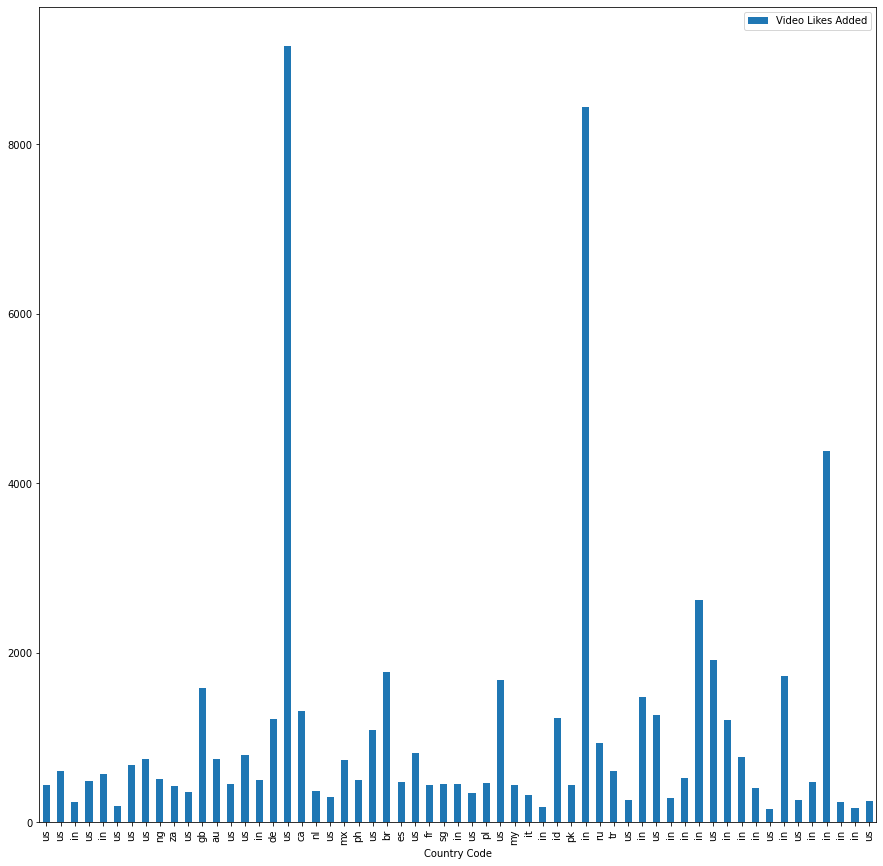

In [ ]:
data1.plot(kind='bar', x="Country Code",y="Video Likes Added",figsize=(15,15)) #data1 10k and user subs added

BY Likes Added we can see :
1. USA 
2. INDIA
3. Brasil

**Which are the countries did like ken's videos but then Removed Likes (-) ?** 

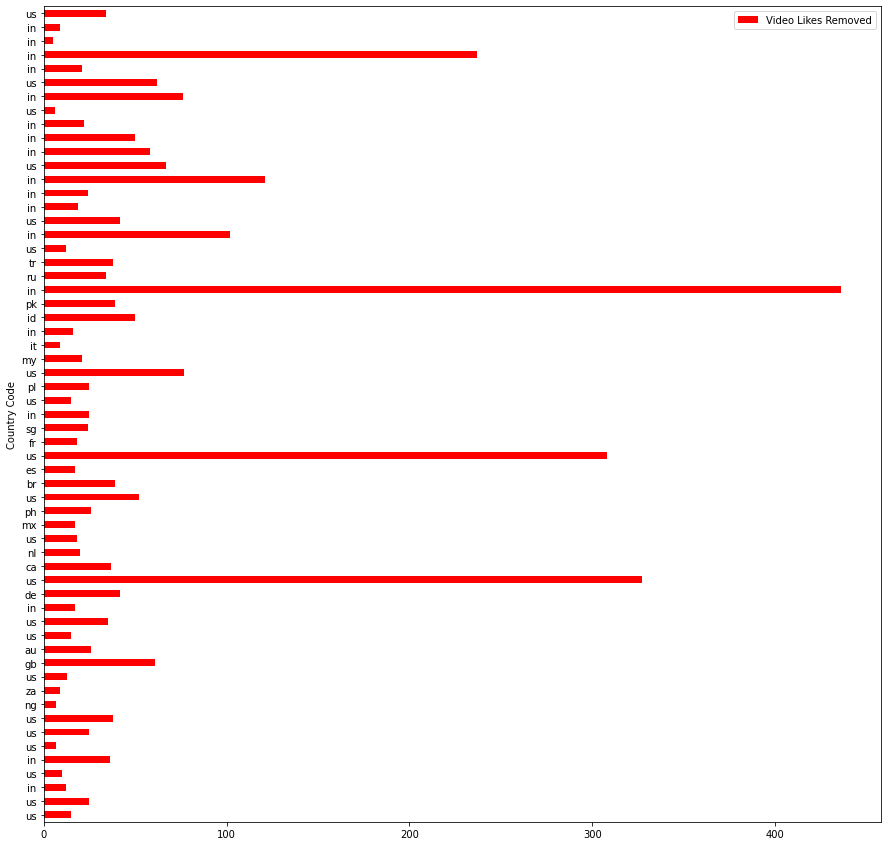

In [ ]:
data1.plot(kind='barh', x="Country Code",y="Video Likes Removed",color='r',figsize=(15,15)) #data1 10k views  and user SiII subscribed

by likes removed  :
1. USA 
2. INDIA
3. deutschland

**Which are the countries that Dislikes ken's videos the most?**

In [ ]:
data2=df1[df1['Video Dislikes Added'] >=22] # choice : 22 dislikes affect the ranking algorithms of this network 

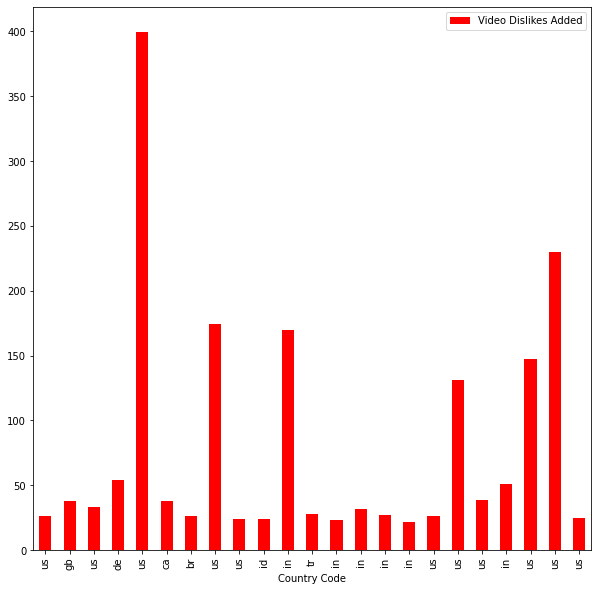

In [ ]:
data2.plot(kind='bar', x="Country Code",y="Video Dislikes Added",color='r',figsize=(10,10))

BY Dislikes Added we can see :
1. USA 
2. INDIA
3. deutschland

**Which videos got  the Users to Add Subscriptions to this channel ?** 

In [ ]:
df1.sort_values(by='User Subscriptions Added',ascending=False).head() 

,Video Title,Video Length,Country Code,Is Subscribed,Views,Video Likes Added,Video Dislikes Added,Video Likes Removed,User Subscriptions Added,User Subscriptions Removed,Average View Percentage,Average Watch Time
35514,How I Would Learn Data Science (If I Had to St...,516,us,True,16389,1084,17,52,9599,103,0.376218,194.128574
35535,How I Would Learn Data Science (If I Had to St...,516,in,True,21717,1481,14,102,9560,93,0.303553,156.633190
12404,The Best Free Data Science Courses Nobody is T...,375,in,True,18327,1723,16,76,3760,46,0.328227,123.085212
53926,3 Proven Data Science Projects for Beginners (...,454,in,True,11415,1211,8,58,2615,22,0.304931,138.438887
35563,How I Would Learn Data Science (If I Had to St...,516,gb,True,2972,191,0,9,1754,12,0.368407,190.097758


**which videos got  the Users to remove Subscriptions to this channel ?** 

In [ ]:
df1.sort_values(by='User Subscriptions Removed',ascending=False).head() 


,Video Title,Video Length,Country Code,Is Subscribed,Views,Video Likes Added,Video Dislikes Added,Video Likes Removed,User Subscriptions Added,User Subscriptions Removed,Average View Percentage,Average Watch Time
35514,How I Would Learn Data Science (If I Had to St...,516,us,True,16389,1084,17,52,9599,103,0.376218,194.128574
35535,How I Would Learn Data Science (If I Had to St...,516,in,True,21717,1481,14,102,9560,93,0.303553,156.633190
12404,The Best Free Data Science Courses Nobody is T...,375,in,True,18327,1723,16,76,3760,46,0.328227,123.085212
53926,3 Proven Data Science Projects for Beginners (...,454,in,True,11415,1211,8,58,2615,22,0.304931,138.438887
3390,Why I Quit Data Science,334,us,True,6994,335,16,4,150,21,0.471285,157.409103


**What are the vids that got a good average percentage view for this channel ?**

In [ ]:
data3=df1[df1['Average View Percentage'] >=3] # sorting by The average view percentage (=3 threshhold\limit)the user spends watching the video 
data3.head()

,Video Title,Video Length,Country Code,Is Subscribed,Views,Video Likes Added,Video Dislikes Added,Video Likes Removed,User Subscriptions Added,User Subscriptions Removed,Average View Percentage,Average Watch Time
10831,The Plagiarism Problem in Data Science,467,kg,True,6,0,0,0,0,0,4.618173,2156.6870
24000,Most Data Science Hopefuls Overlook This Impor...,216,by,True,1,0,0,0,0,0,3.336500,720.6840
2584,Why Kaggle Should Be Your Favorite Data Scienc...,59,tz,True,2,0,0,0,0,0,4.967797,293.1000
21872,Project Presentation - Expectations vs. Realit...,59,no,True,10,1,1,0,1,0,3.586968,211.6311


In [ ]:
data3['Average Watch Time'].max()


2156.687

  The average time the user spends watching long videos is about 1h.39 min maximum .

Nicely done!



#**part(2)**
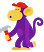

lets check out what goes into this file. 

In [ ]:
df2.head(5)

,Video,Video title,Video pub­lish time,Com­ments ad­ded,Shares,Dis­likes,Likes,Sub­scribers lost,Sub­scribers gained,RPM (USD),CPM (USD),Av­er­age per­cent­age viewed (%),Av­er­age view dur­a­tion,Views,Watch time (hours),Sub­scribers,Your es­tim­ated rev­en­ue (USD),Im­pres­sions,Im­pres­sions click-through rate (%)
0,Total,NaN,NaN,14197,39640,3902,225021,45790,229241,5.276,11.990,26.61,0:03:25,5568487,317602.3536,183451,29068.652,100954064,3.16
1,4OZip0cgOho,How I Would Learn Data Science (If I Had to St...,"May 8, 2020",907,9583,942,46903,451,46904,6.353,12.835,36.65,0:03:09,1253559,65850.7042,46453,7959.533,26498799,3.14
2,78LjdAAw0wA,100K Channel Update + AMA Stream!,"Nov 12, 2020",412,4,4,130,15,12,2.668,6.259,6.26,0:05:14,2291,200.2966,-3,6.113,188318,0.72
3,hO_YKK_0Qck,Uber Driver to Machine Learning Engineer in 9 ...,"Jul 16, 2020",402,152,15,881,9,198,9.516,11.695,15.12,0:10:21,21350,3687.3387,189,202.963,442334,2.53
4,uXLnbdHMf8w,Why I'm Starting Data Science Over Again.,"Aug 29, 2020",375,367,22,2622,40,1957,3.143,7.943,33.41,0:02:36,49564,2148.3110,1917,155.779,521185,4.01


In [ ]:
df2.shape

(224, 19)

##inspecting

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Video                                 224 non-null    object 
 1   Video title                           223 non-null    object 
 2   Video pub­lish time                   223 non-null    object 
 3   Com­ments ad­ded                      224 non-null    int64  
 4   Shares                                224 non-null    int64  
 5   Dis­likes                             224 non-null    int64  
 6   Likes                                 224 non-null    int64  
 7   Sub­scribers lost                     224 non-null    int64  
 8   Sub­scribers gained                   224 non-null    int64  
 9   RPM (USD)                             224 non-null    float64
 10  CPM (USD)                             222 non-null    float64
 11  Av­er­age per­cent­

First of all we can see that the first Row seems to be a summarized -Total- stats Row, that is why we already see some missing values on Video Title and Video Publish Time, so we will have to handle that row .

So I am gonna remove it from the video_metrics table .


In [ ]:
# Drop first row by selecting all rows except first row 
df2 = df2.iloc[1: , :]



I will fix the date from Video Publish time and break it also down into new
features of Year and Month

I will also rename the Video to External Video Link like on the Country & Subscriber Status data set to be able to make some joins later.

In [ ]:
#rename 'Video' column 
df2.rename(columns={'Video':'External Video Link '},inplace=True)
df2.rename(columns={'Video title':'Video Title'},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
#Turning Video publish time feature to appropriate Date data type 
df2['Video pub­lish time'] = pd.to_datetime(df2['Video pub­lish time'])

In [ ]:
df2['Av­er­age view dur­a­tion'] =pd.to_datetime(df2['Av­er­age view dur­a­tion'], format='%H:%M:%S') - pd.to_datetime(df2['Av­er­age view dur­a­tion'], format='%H:%M:%S').dt.normalize()

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 1 to 223
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype          
---  ------                                --------------  -----          
 0   External Video Link                   223 non-null    object         
 1   Video Title                           223 non-null    object         
 2   Video pub­lish time                   223 non-null    datetime64[ns] 
 3   Com­ments ad­ded                      223 non-null    int64          
 4   Shares                                223 non-null    int64          
 5   Dis­likes                             223 non-null    int64          
 6   Likes                                 223 non-null    int64          
 7   Sub­scribers lost                     223 non-null    int64          
 8   Sub­scribers gained                   223 non-null    int64          
 9   RPM (USD)                             223 non-null    float64    

Lets also check if there are any missing values and duplicate rows in the data.


In [ ]:
for i in df2.columns:
    print('{} has unique values {}'.format(i,df2[i].unique()),'\n')

External Video Link  has unique values ['4OZip0cgOho' '78LjdAAw0wA' 'hO_YKK_0Qck' 'uXLnbdHMf8w' 'Xgg7dIKys9E'
 '-3d1NctSv0c' 'Ip50cXvpWY4' '4qZINLzwYyk' '742LQ38OioU' 'GmW4F6MHqqs'
 'Q9FjwzKFPuM' '41Clrh6nv1s' '8igH8qZafpo' 'Kq9dkZu0bpg' 'sHRq-LshG3U'
 'S_CuB__nsmI' 'I3FBJdiExcg' '6aaIbd-GpZs' 'QN3wXPZSjpE' 'SVtRsDhHlDk'
 'zF_Q2v_9zKY' '_rbrdNTpZGo' 'myhoWUrSP7o' '2qVWurPFwfc' 'zGlJ-QndG8E'
 'BBDiadC8BvE' 'mEZ1Hj5yQ-8' 'fhi4dOhmW-g' 'yukdXV9LR48' 'g7on3Rw0Ovg'
 'hOUrxTeBJQc' 'xpIFS6jZbe8' 'SLC5sPZSLY4' 'm5pwx3hgtzM' 'n3vw0M5RrPU'
 'zSwM5uVeylU' 'qV_AlRwhI3I' '1aXk2RViq3c' 'QWgg4w1SpJ8' 'BZFfNwj7JhE'
 'MpF9HENQjDo' 'XjC3FPL-S78' 'a3VWq9smqhM' 'domVw8isGOI' ' -pdXWmj9xxU'
 '7JCterBrcvk' 'xjhW1rSQeik' 'EMq4PH7PCeA' 'SsGKZe4dVyk' 'S4Lei5mOppc'
 'ji7DtgUeKCI' 'r-DR9HBaipU' 'vQGJvmhpq_s' 'WRF_dKZ_i24' '8nTmuKI2oyA'
 'QQLToUlgN7A' 'iGUiLWFDWfk' 'jf3j0lWmFPU' 'o-wsyxWbPOw' 'YR9Faf1uZDg'
 'vwvdtXMcNzI' 'FqNpDNmpcEo' 'Uf0dO-pgOrk' 'rEWPqw6rMGI' 'uic34RTaI-w'
 'KU__lDJj5iU' 'KQ80oD_boBM' '7O4dpR9

In [ ]:
df2.describe()

,Com­ments ad­ded,Shares,Dis­likes,Likes,Sub­scribers lost,Sub­scribers gained,RPM (USD),CPM (USD),Av­er­age per­cent­age viewed (%),Av­er­age view dur­a­tion,Views,Watch time (hours),Sub­scribers,Your es­tim­ated rev­en­ue (USD),Im­pres­sions,Im­pres­sions click-through rate (%)
count,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,221.000000,223.000000,223,2.230000e+02,223.000000,223.000000,223.000000,2.230000e+02,223.000000
mean,63.654709,177.753363,17.497758,1008.865471,13.260090,587.309417,4.438300,11.440303,34.120807,0 days 00:03:20.659192825,2.496860e+04,1424.201917,574.049327,130.348578,4.526904e+05,3.083812
std,91.559620,733.331174,69.578517,3577.895609,33.242009,3302.316610,1.792295,3.342147,15.144409,0 days 00:01:34.649236245,8.960956e+04,4804.353468,3270.679889,554.503516,1.864351e+06,1.674199
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5.439000,5.230000,0 days 00:00:25,6.000000e+01,1.068400,-21.000000,0.000000,3.650000e+02,0.490000
25%,18.000000,19.000000,1.000000,163.000000,2.000000,27.000000,3.219500,9.377000,23.515000,0 days 00:02:24.500000,3.933000e+03,176.995550,19.500000,12.145500,9.894000e+04,1.920000
50%,37.000000,46.000000,4.000000,342.000000,7.000000,68.000000,4.334000,11.160000,35.260000,0 days 00:03:09,8.275000e+03,393.397300,62.000000,32.538000,1.541870e+05,2.890000
75%,66.000000,112.500000,11.000000,713.000000,14.000000,234.500000,5.382500,12.904000,43.485000,0 days 00:04:01.500000,1.831800e+04,1128.712150,227.000000,93.901500,2.799850e+05,3.980000
max,907.000000,9583.000000,942.000000,46903.000000,451.000000,46904.000000,10.387000,37.786000,76.600000,0 days 00:10:21,1.253559e+06,65850.704200,46453.000000,7959.533000,2.649880e+07,11.510000


Displaying summary statistics for a large dataframe is always a good PRACTISE  to do for checking any ambiguity or misleading values : 


*  As far as what constitutes a good click through rate, the average is around 1.91% for search and 0.35% for display.
 for ken's vids  minimum click through rate is 0.49% for display

* On average, a YouTube channel can receive CPM : 18 dollar per 1000 ad views, which 
equates to RPM : (3 dollar - 5 dollar) per 1000 video views.

for his youtube revenue 
mean= 11.160000 --> On average, cost per 1000 ad impressions before YouTube revenue share = he made 11.440303 (~12 USD)  and  total revenue (after YouTube's revenue share) per 1000 views (USD) 4.438300

* As we can see the column ('Subscribers ') got MINIMUM value of -21.00  whereas Sub­scribers lost AND Sub­scribers gained  both got 0 from this we can notice that somthing went wrong while  generating our data .


**difference between rpm and cpm youtube** : CPM is cost per 1000 ad impressions before YouTube revenue share. RPM is your total revenue(after YouTube's revenue share) per 1000 views.

In [ ]:
##df2['Sub­scribers'] = df2['Sub­scribers'].map({-5: 5 ,-3: 3, -21:21 , -2:2}) 
df2['Sub­scribers']=df2['Sub­scribers'].replace({-5: 5 ,-3: 3, -21:21 , -2:2}) 

In [ ]:
df2[['Sub­scribers gained','Sub­scribers lost','Sub­scribers']].describe()

,Sub­scribers gained,Sub­scribers lost,Sub­scribers
count,223.000000,223.000000,223.000000
mean,587.309417,13.260090,574.327354
std,3302.316610,33.242009,3270.630860
min,0.000000,0.000000,0.000000
25%,27.000000,2.000000,20.000000
50%,68.000000,7.000000,62.000000
75%,234.500000,14.000000,227.000000
max,46904.000000,451.000000,46453.000000


In [ ]:
df2.isnull().sum()

External Video Link                     0
Video Title                             0
Video pub­lish time                     0
Com­ments ad­ded                        0
Shares                                  0
Dis­likes                               0
Likes                                   0
Sub­scribers lost                       0
Sub­scribers gained                     0
RPM (USD)                               0
CPM (USD)                               2
Av­er­age per­cent­age viewed (%)       0
Av­er­age view dur­a­tion               0
Views                                   0
Watch time (hours)                      0
Sub­scribers                            0
Your es­tim­ated rev­en­ue (USD)        0
Im­pres­sions                           0
Im­pres­sions click-through rate (%)    0
dtype: int64

the missing values are contained in the CPM (USD) feature and after observing the fields that these 2 values are missing I can see that it is a small 3 minute video that did not have much views, so I will just replace the two 'NA' values with zeros as I guess they reflect the actual values.

In [ ]:
df2['CPM (USD)']=df2['CPM (USD)'].fillna(0)
df2['CPM (USD)'].isnull().sum()

0

##data visualization and exploration

Last, I will create a datatable to explore the data a bit. I will include Title, date published, Shares, Likes, Dislikes, Total Watch Time and Impressions click through rate.

In [ ]:
datatable=df2[['Video Title', 'Video pub­lish time', 'Views','Sub­scribers lost','Sub­scribers gained' ,'Shares', 'Likes', 'Dis­likes','Com­ments ad­ded', 'Watch time (hours)' ,'Your es­tim­ated rev­en­ue (USD)']]
datatable.head(5)

,Video Title,Video pub­lish time,Views,Sub­scribers lost,Sub­scribers gained,Shares,Likes,Dis­likes,Com­ments ad­ded,Watch time (hours),Your es­tim­ated rev­en­ue (USD)
1,How I Would Learn Data Science (If I Had to St...,2020-05-08,1253559,451,46904,9583,46903,942,907,65850.7042,7959.533
2,100K Channel Update + AMA Stream!,2020-11-12,2291,15,12,4,130,4,412,200.2966,6.113
3,Uber Driver to Machine Learning Engineer in 9 ...,2020-07-16,21350,9,198,152,881,15,402,3687.3387,202.963
4,Why I'm Starting Data Science Over Again.,2020-08-29,49564,40,1957,367,2622,22,375,2148.3110,155.779
5,Interview with the Director of AI Research @ N...,2020-08-05,13429,11,161,118,590,15,329,1034.3945,39.920



**How many videos has Ken published each different year?**

In [ ]:
#EXTRACTING THE YEARS FROM THE DATE 
years = datatable['Video pub­lish time'].dt.year
#We will also add a 'Total' column that sums up the total videos over the entire period 2017 - 2022, as follows:
datatable['Total'] = datatable.sum(axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/style.py:271: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  conv.to_rgba(color)


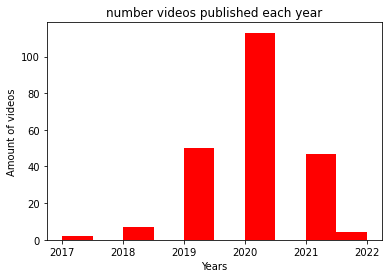

In [ ]:
import matplotlib.pyplot as plt

years.plot(kind='hist',color='R')
plt.title('number videos published each year')
plt.ylabel('Amount of videos')
plt.xlabel('Years')
plt.show()


Seems like 2020 was a big YouTube grind year for Ken with 113 published videos, while this dropped to 47 in 2021.

Lets check some distributions from the video metrics of the videos to get some ideas.

**what revenue Kens video generate for him ?**

**What is CPM**? While YouTube CPC means the amount of money that you get for every click on a certain ad, CPM is an abbreviation for Cost per Mille, where “mille” stands for a thousand views. Thus, you are paid each time when your ad reaches this mark. The more views the ad gets, the more money you earn.

**RPM**is a snapshot of the rate at which you're earning money on YouTube. If it goes up, it means you're earning more money for every 1000 views, and if it goes down, you're earning less. Note that your RPM may go down when there's an increase in unmonetized views, even if your revenue was the same.

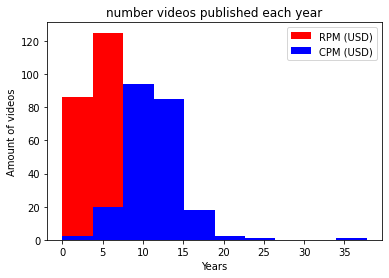

In [ ]:
import matplotlib.pyplot as plt

df2[['RPM (USD)', 'CPM (USD)']].plot(kind='hist',color='R''b')
plt.title('number videos published each year')
plt.ylabel('Amount of videos')
plt.xlabel('Years')
plt.show()


We can see that the CPM (USD) distribution has a mean close to 10 USD, which means that if ads play Ken would make around these amount of money per Mille, but a more clear picture for what amount of money does Ken really make can be seen from the RPM (USD) distribution plot since CPM is not a real indication of net profit, as YouTube keeps a large chunk of this money. We can see that most of Kens videos generate an RPM (USD) close to 5 USD, which is a far more accurate number on what revenue Kens video generate for him.

**What are the top10 videos that got the heighest es­tim­ated rev­en­ue (USD)?**

In [ ]:
datatable.sort_values(['Total'], ascending=False, inplace=True)
df_top10= datatable.head(10)
df_top10


/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,Video Title,Video pub­lish time,Views,Sub­scribers lost,Sub­scribers gained,Shares,Likes,Dis­likes,Com­ments ad­ded,Watch time (hours),Your es­tim­ated rev­en­ue (USD),Total
1,How I Would Learn Data Science (If I Had to St...,2020-05-08,1253559,451,46904,9583,46903,942,907,65850.7042,7959.533,1.433059e+06
7,The Best Free Data Science Courses Nobody is T...,2020-03-09,297222,131,10734,4694,19464,75,294,10465.0467,1217.046,3.442961e+05
13,3 Proven Data Science Projects for Beginners (...,2020-02-17,237467,72,9508,1935,14708,64,220,10560.3597,885.504,2.754199e+05
17,Beginner Kaggle Data Science Project Walk-Thro...,2020-07-17,168183,40,2585,1265,4321,59,174,17039.6566,894.753,1.945614e+05
29,The Projects You Should Do To Get A Data Scien...,2019-07-30,131630,53,2793,868,5218,87,124,7153.7437,504.669,1.484314e+05
12,How I Would Learn Data Science in 2021 (What H...,2020-12-19,123515,57,3358,741,5869,63,232,7724.2735,929.400,1.424887e+05
15,Why You Probably Won't Become a Data Scientist,2021-04-09,108133,67,2237,386,3225,129,213,6435.5906,601.671,1.214273e+05
41,Data Science Project from Scratch - Part 1 (Pr...,2020-04-03,102854,22,3184,744,3197,21,82,3887.4233,445.187,1.144366e+05
11,Data Science Certificate vs Bootcamp vs Master...,2020-01-18,92355,37,1576,456,2708,48,239,9057.2752,767.493,1.072438e+05
20,Why I Quit Data Science,2021-02-12,98777,85,832,197,2274,159,165,3756.0683,399.180,1.066442e+05


since the most exposure would lead to the greater gain of subscribers,these videos led to substantial growth for this channel and we can tell that too by seeing the es­tim­ated rev­en­ues (USD) 

The video *How I would Learn Data Science (if I Had to Start Over) is by far the most Viewed video of the channel and has also close to ~ 47k likes.


**what words does Ken uses the most in his titles?**


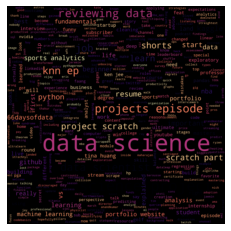

In [ ]:
from wordcloud  import WordCloud, STOPWORDS

comment_words = ''

stopwords = set(STOPWORDS)

for val in df2['Video Title']:
     
    val = str(val)
    tokens = val.split()
     
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width=2000, height=2000,margin=0,
                      background_color='black',
                      contour_color='white',
                      max_words=500,
                      colormap="magma",
                      contour_width=3).generate(comment_words)

plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

click here  :  [wordcloud Video Title](https://imgur.com/Pf5hXVL)

# 👍 

6.STORE

---



In [ ]:
df1.to_csv('D1_clean.csv')

In [ ]:
df2.to_csv('D2_clean.csv')

**Some advanced projects could be:**

▶Pulling sentiment from thumbnails and titles and comparing that with performance.

▶creating a chatbot to interact with his audience 


|***✌ Hinda Melliti*** | <img src="https://ci3.googleusercontent.com/proxy/4hMEw4gPGF7N8u9ijJtgT2hQUHOq6BG4ZwgTHrxPeG60YHlIjOTLvSjZTi-7_7nrtyY=s0-d-e1-ft#https://i.imgur.com/NxIMNDY.gif" width = 200>|
| :---              |          ---: |

 
